# Statistics LINEAR REGRESSION

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

In [6]:
df=pd.read_csv('/Users/teahupoo20/Documents/GitHub/data-ft-par-labs/Labs/data/Fitbit2.csv')

In [7]:
df

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


In [8]:
df.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

<AxesSubplot:xlabel='NumberOfAwakings', ylabel='MinutesOfBeingAwake'>

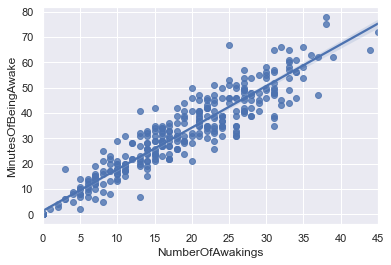

In [9]:
sns.regplot(data=df, x='NumberOfAwakings', y='MinutesOfBeingAwake')
#the dataset seems homoskedastic

<AxesSubplot:xlabel='NumberOfAwakings'>

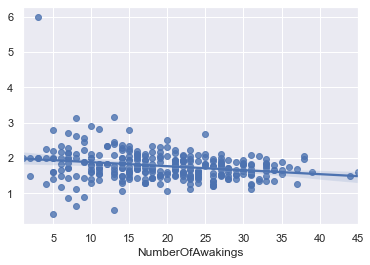

In [14]:
sns.regplot(data=df, x='NumberOfAwakings', y=df.eval('MinutesOfBeingAwake/NumberOfAwakings'))
#the dataset is not homogeneous (heteroskedastic)


In [15]:
from statsmodels.formula.api import ols

In [17]:
model=ols('MinutesOfBeingAwake ~ NumberOfAwakings', data=df)
#define data thats going to be used
#R is correlation 
#the higher the column number, the higher the R squared, so we use R squared adjusted
#AIC BIC = the lower the better 

In [18]:
model_fit=model.fit()
#calculate everything

In [19]:
model_fit.summary()
#print the results
#Cond No. is high === WARNING MULTICOLLINEARITY

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Tue, 09 Mar 2021   Prob (F-statistic):          1.89e-189
Time:                         12:35:03   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df.corr().MinutesOfBeingAwake.abs().sort_values()

Activity Calories             0.010859
Days_encoded                  0.013195
Work_or_Weekend               0.038051
Calorie burned                0.041999
Floors                        0.064587
Minutes Lightly Active        0.096107
Minutes Fairly Active         0.104303
Months_encoded                0.112566
Minutes Very Active           0.116559
Steps                         0.124846
Distance_miles                0.130447
Distance                      0.130447
Yesterday_sleep_efficiency    0.131307
Yesterday_sleep               0.160424
Minutes Sedentary             0.200589
Sleep efficiency              0.599178
MinutesOfSleep                0.779595
Hours Sleep                   0.779595
LengthOfRestInMinutes         0.820110
NumberOfAwakings              0.951817
MinutesOfBeingAwake           1.000000
Name: MinutesOfBeingAwake, dtype: float64

In [22]:
df.corr().MinutesOfSleep

Calorie burned                0.011485
Steps                         0.130986
Distance                      0.129442
Floors                        0.069464
Minutes Sedentary             0.204242
Minutes Lightly Active        0.105048
Minutes Fairly Active         0.114950
Minutes Very Active           0.108018
Activity Calories            -0.005804
MinutesOfSleep                1.000000
MinutesOfBeingAwake           0.779595
NumberOfAwakings              0.780512
LengthOfRestInMinutes         0.997184
Distance_miles                0.129442
Days_encoded                 -0.033913
Work_or_Weekend               0.094152
Hours Sleep                   1.000000
Sleep efficiency              0.807964
Yesterday_sleep               0.148113
Yesterday_sleep_efficiency    0.095999
Months_encoded               -0.127980
Name: MinutesOfSleep, dtype: float64

In [ ]:
#according to the tables above we can conclude that
Sleep efficiency MinutesOfSleep have the largest correlation with MinutesOfBeingAwake
at the same time we can say that hours and minutes of sleep are functionnaly dependant hence I exclude hours.  

In [23]:
model=ols('MinutesOfBeingAwake ~ NumberOfAwakings + LengthOfRestInMinutes + MinutesOfSleep', data=df)



In [25]:
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.951
Model:                             OLS   Adj. R-squared:                  0.950
Method:                  Least Squares   F-statistic:                     2327.
Date:                 Tue, 09 Mar 2021   Prob (F-statistic):          1.39e-236
Time:                         14:41:06   Log-Likelihood:                -1040.1
No. Observations:                  367   AIC:                             2088.
Df Residuals:                      363   BIC:                             2104.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.3022      0.461     -0.655      0.513      -1.209       0.605
NumberOfAwakings          0.6747      0.058     11.628      0.000       0.561       0.789
LengthOfRestInMinutes     0.5297      0.030     17.385      0.000       0.470       0.590
MinutesOfSleep           -0.5262      0.031    -16.977      0.000      -0.587      -0.465
==============================================================================
Omnibus:                      106.901   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.434
Skew:                          -1.251   Prob(JB):                     1.00e-85
Kurtosis:                       7.398   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#this guy has less AIC BIC then the previous one so it's better. The p is lower as well 

In [26]:
$MinutesOfBeingAwake = 3.88 + C * Month + 1.4814 * NumberOfAwakings + 0.00115 * LengthOfRestInMinutes

SyntaxError: invalid syntax (<ipython-input-26-d04f40c28954>, line 1)

In [27]:
3.8847 - 5.0023*1 + 1.4814 * 3+ 10 *0.0115

3.4416

In [28]:
y_pred=model_fit.predict()

In [29]:
df['ypred']=y_pred

<AxesSubplot:xlabel='MinutesOfBeingAwake', ylabel='ypred'>

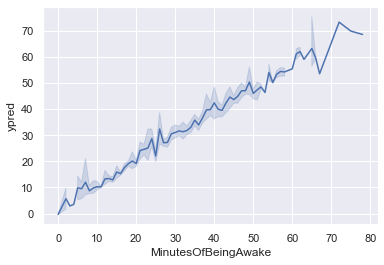

In [31]:
sns.lineplot(data=df, x='MinutesOfBeingAwake', y='ypred')

<AxesSubplot:xlabel='MinutesOfBeingAwake', ylabel='ypred'>

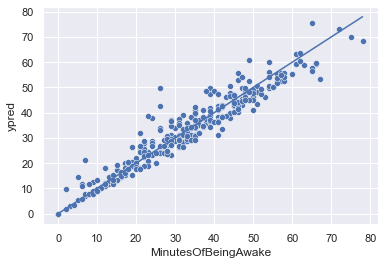

In [33]:
sns.scatterplot(data=df, x='MinutesOfBeingAwake', y='ypred')
sns.lineplot(data=df, x='MinutesOfBeingAwake', y='MinutesOfBeingAwake')

In [34]:
model_fit.resid.mean()

2.6930924943931863e-13

<AxesSubplot:>

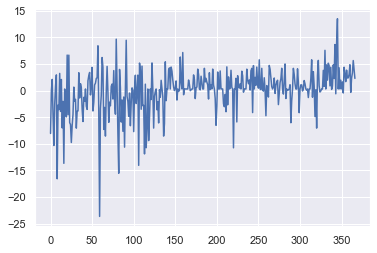

In [35]:
model_fit.resid.plot()

<AxesSubplot:>

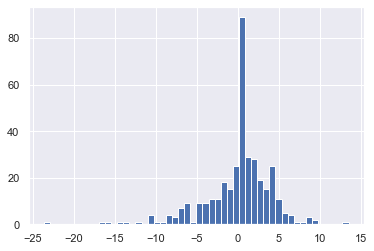

In [38]:
model_fit.resid.hist(bins=50)

/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

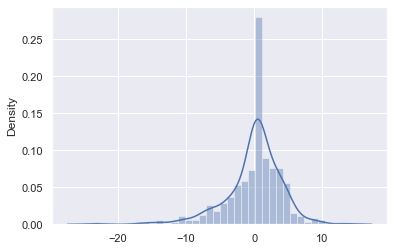

In [39]:
sns.distplot(model_fit.resid)

In [40]:
from statsmodels.api import OLS
from statsmodels.formula.api import ols

In [41]:
#OLS 
#OLS(y, X).fit()

In [42]:
OLS(df.MinutesOfBeingAwake, df._get_numeric_data().drop('MinutesOfBeingAwake', axis=1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.955
Model:                             OLS   Adj. R-squared:                  0.953
Method:                  Least Squares   F-statistic:                     412.3
Date:                 Tue, 09 Mar 2021   Prob (F-statistic):          3.56e-222
Time:                         15:41:33   Log-Likelihood:                -1022.0
No. Observations:                  367   AIC:                             2082.
Df Residuals:                      348   BIC:                             2156.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Calorie burned             -8.769e-05      0.000     -0.357      0.721      -0.001       0.000
Steps                       5.977e-05   6.18e-05      0.967      0.334   -6.18e-05       0.000
Distance                       0.2894      0.123      2.356      0.019       0.048       0.531
Floors                        -0.0476      0.024     -1.947      0.052      -0.096       0.000
Minutes Sedentary              0.0010      0.001      1.337      0.182      -0.000       0.003
Minutes Lightly Active        -0.0087      0.004     -2.133      0.034      -0.017      -0.001
Minutes Fairly Active         -0.0296      0.012     -2.478      0.014      -0.053      -0.006
Minutes Very Active           -0.0361      0.014     -2.543      0.011      -0.064      -0.008
Activity Calories          -5.908e-05      0.000     -0.530      0.597      -0.000       0.000
MinutesOfSleep                 2.6194      2.754      0.951      0.342      -2.797       8.036
NumberOfAwakings              -3.4364      3.532     -0.973      0.331     -10.383       3.510
LengthOfRestInMinutes         -2.6369      2.773     -0.951      0.342      -8.092       2.818
Distance_miles                 0.1798      0.076      2.356      0.019       0.030       0.330
Days_encoded                   0.5292      0.176      3.011      0.003       0.184       0.875
Work_or_Weekend                2.3266      0.799      2.912      0.004       0.755       3.898
Hours Sleep                    0.0437      0.046      0.951      0.342      -0.047       0.134
Sleep efficiency              -0.0127      0.011     -1.145      0.253      -0.034       0.009
Yesterday_sleep               -0.2140      0.144     -1.491      0.137      -0.496       0.068
Yesterday_sleep_efficiency     0.0085      0.011      0.779      0.437      -0.013       0.030
Months_encoded                -0.0885      0.064     -1.393      0.165      -0.213       0.036
ypred                          6.0355      5.234      1.153      0.250      -4.259      16.330
==============================================================================
Omnibus:                      115.158   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              504.537
Skew:                          -1.287   Prob(JB):                    2.76e-110
Kurtosis:                       8.135   Cond. No.                     1.31e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.07e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(df._get_numeric_data().drop('MinutesOfBeingAwake', axis=1), df.MinutesOfBeingAwake)
model.coef_

array([-8.72207687e-05,  6.06589695e-05,  2.21602493e+06, -4.72378617e-02,
        1.02042217e-03, -8.59794931e-03, -2.99350016e-02, -3.61988469e-02,
       -5.41062366e-05, -8.22412213e+08, -1.82084328e+08, -1.42952513e+08,
       -3.56634688e+06,  5.28200719e-01,  2.31792044e+00,  5.78642546e+10,
       -1.23984550e-02, -2.12038644e-01,  8.15310392e-03, -8.67424168e-02,
        2.69869712e+08])

In [44]:
model.intercept_

81566552.32406184

In [ ]:
Lets build a proper OLS model by cleaning the dataset first and testing all the assumptions and trying to make 